In [1]:
import covasim

Covasim 3.0.7 (2021-06-29) — © 2021 by IDM


In [2]:

import covasim.utils as cvu

from importlib import reload

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import sibyl_covasim


In [3]:
pars_sim={"pop_type":"hybrid", 
          "n_days":60, 
          "pop_size":30_000,
          "pop_infected":12,
          #"location":"UK", 
          "rand_seed":3,
         }

In [4]:
reload(sibyl_covasim)

<module 'sibyl_covasim' from '/home/fmazza/projects/covasim_integration/interventions/sibyl_covasim/__init__.py'>

In [5]:
sim = covasim.Sim(pars=pars_sim)
sim.run()

Initializing sim with 30000 people for 60 days
  Running 2020-03-01 ( 0/60) (1.05 s)  ———————————————————— 2%
  Running 2020-03-11 (10/60) (1.11 s)  •••————————————————— 18%
  Running 2020-03-21 (20/60) (1.19 s)  ••••••—————————————— 34%
  Running 2020-03-31 (30/60) (1.28 s)  ••••••••••—————————— 51%
  Running 2020-04-10 (40/60) (1.39 s)  •••••••••••••——————— 67%
  Running 2020-04-20 (50/60) (1.52 s)  ••••••••••••••••———— 84%
  Running 2020-04-30 (60/60) (1.70 s)  •••••••••••••••••••• 100%

Simulation summary:
   13702 cumulative infections
       0 cumulative reinfections
   10097 cumulative infectious
    6317 cumulative symptomatic cases
     290 cumulative severe cases
      59 cumulative critical cases
    4531 cumulative recoveries
      11 cumulative deaths
       0 cumulative tests
       0 cumulative diagnoses
       0 cumulative known deaths
       0 cumulative quarantined people
       0 cumulative vaccinations
       0 cumulative vaccinated people



Sim(<no label>; 2020-03-01 to 2020-04-30; pop: 30000 hybrid; epi: 13702⚙, 11☠)

/home/fmazza/projects/covasim_integration/covasim/covasim/plotting.py:218: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(bottom=0)


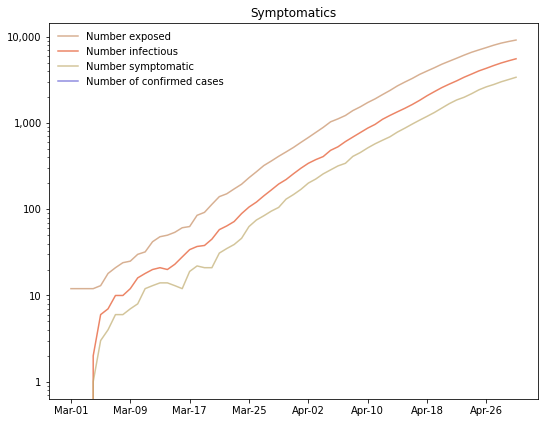

In [62]:
#fig,axes = plt.subplots(sharex=True, )
fig = sim.plot(to_plot={#"quarantine":["n_quarantined", "cum_diagnoses"],
                          "Symptomatics": ["n_exposed","n_infectious","n_symptomatic", "n_diagnosed"],
                         },fig_args=dict(figsize=(8,6)), log_scale=True)


In [7]:
import covasim.interventions as cvi

In [8]:
reload(covasim.interventions)
reload(covasim)
reload(sibyl_covasim.base)
reload(sibyl_covasim)

Covasim 3.0.7 (2021-06-29) — © 2021 by IDM


<module 'sibyl_covasim' from '/home/fmazza/projects/covasim_integration/interventions/sibyl_covasim/__init__.py'>

In [9]:
interv = covasim.interventions.test_num(100, symp_test=20., start_day=12)
ct = covasim.contact_tracing(trace_probs=.4, trace_time=1, start_day=12)

In [32]:
reload(sibyl_covasim.base)
reload(sibyl_covasim)
cont_copy = sibyl_covasim.ContactsSaver()

In [33]:
pars_sim_dyn = dict(pars_sim)
pars_sim_dyn["dynam_layer"] = {k:1 for k in ["w","c"]}

In [34]:
sim_int = covasim.Sim(pars=pars_sim_dyn, interventions=[cont_copy], label="20x sympt tests")#interv,ct,

In [35]:
sim_int.initialize()
sim_int.run()

Initializing sim with 30000 people for 60 days
  Running "20x sympt tests": 2020-03-01 ( 0/60) (0.00 s)  ———————————————————— 2%
  Running "20x sympt tests": 2020-03-11 (10/60) (0.33 s)  •••————————————————— 18%
  Running "20x sympt tests": 2020-03-21 (20/60) (0.68 s)  ••••••—————————————— 34%
  Running "20x sympt tests": 2020-03-31 (30/60) (1.03 s)  ••••••••••—————————— 51%
  Running "20x sympt tests": 2020-04-10 (40/60) (1.40 s)  •••••••••••••——————— 67%
  Running "20x sympt tests": 2020-04-20 (50/60) (1.80 s)  ••••••••••••••••———— 84%
  Running "20x sympt tests": 2020-04-30 (60/60) (2.22 s)  •••••••••••••••••••• 100%

Simulation "20x sympt tests" summary:
    7102 cumulative infections
       0 cumulative reinfections
    4657 cumulative infectious
    2827 cumulative symptomatic cases
     148 cumulative severe cases
      40 cumulative critical cases
    1726 cumulative recoveries
       6 cumulative deaths
       0 cumulative tests
       0 cumulative diagnoses
       0 cumulativ

Sim("20x sympt tests"; 2020-03-01 to 2020-04-30; pop: 30000 hybrid; epi: 7102⚙, 6☠)

/home/fmazza/projects/covasim_integration/covasim/covasim/plotting.py:302: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  xmin,xmax = ax.get_xlim()
/home/fmazza/projects/covasim_integration/covasim/covasim/plotting.py:302: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  xmin,xmax = ax.get_xlim()
/home/fmazza/projects/covasim_integration/covasim/covasim/plotting.py:218: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(bottom=0)
/home/fmazza/projects/covasim_integration/covasim/covasim/plotting.py:218: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(bottom=0)


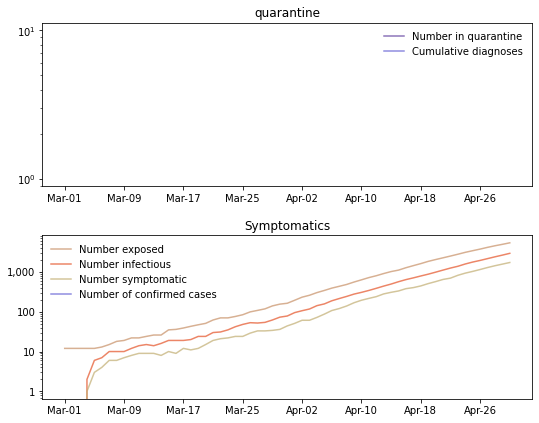

In [36]:
#fig,axes = plt.subplots(sharex=True, )
fig = sim_int.plot(to_plot={"quarantine":["n_quarantined", "cum_diagnoses"],
                          "Symptomatics": ["n_exposed","n_infectious","n_symptomatic", "n_diagnosed"],
                         },fig_args=dict(figsize=(8,6)), log_scale=True)


In [37]:
cc = sim_int.get_interventions()[-1]

### Check contacts

In [38]:

import scipy.sparse as sp

In [39]:
def merge_layers(contacts):
    all_c = []
    for k, lay in contacts.items():
        lay["layer"] = k
        all_c.append(lay)
    
    return pd.concat(all_c,ignore_index=True).sort_values(["p1","p2"])


In [40]:
all_contacts={k: merge_layers(lay) for k, lay in cc.contacts.items()}#pd.concat(all_c,ignore_index=True).sort_values(["p1","p2"])

In [48]:
np.where(cc.to_csr(0).diagonal() != 0)

(array([ 2378,  2779,  3110,  5191,  5451,  6697,  7898,  8315,  9243,
         9684,  9994, 11102, 11528, 13108, 13351, 13352, 14381, 16074,
        17929, 19008, 21125, 22952, 23355, 25141, 25597, 28470]),)

In [ ]:
density = lambda mat: mat.getnnz() / np.prod(mat.shape)


In [50]:
#for t in all_contacts:
t=2
cts = all_contacts[t]
eq = cts[cts.p1 == cts.p2]
print(t, "num self edges: ",len(eq))
print(eq[["p1","beta","layer"]])

2 num self edges:  22
           p1  beta layer
35094    2779   1.0     s
35721    3110   1.0     s
39603    5191   1.0     s
40016    5451   1.0     s
214149   5561   1.0     w
299828   6423   1.0     c
45262    8315   1.0     s
47811    9684   1.0     s
48338    9994   1.0     s
514767  10144   1.0     c
376031  12893   1.0     c
54610   13351   1.0     s
54613   13352   1.0     s
272088  17117   1.0     c
415417  18124   1.0     c
400513  21102   1.0     c
72319   23355   1.0     s
425096  25318   1.0     c
76770   25597   1.0     s
164952  26434   1.0     w
486717  27392   1.0     c
502362  29920   1.0     c


In [52]:
swab_delays = dict(dist="uniform", par1=1, par2=6)
test_delay = covasim.interventions.test_num(100, symp_test=50., start_day=12, swab_delay=swab_delays)


In [53]:
sim_int_symp_del = covasim.Sim(pars=pars_sim, interventions=[test_delay,ct], label="50x sympt tests, delayed")
sim_int_symp_del.run()

Initializing sim with 30000 people for 60 days
  Running "50x sympt tests, delayed": 2020-03-01 ( 0/60) (1.66 s)  ———————————————————— 2%
  Running "50x sympt tests, delayed": 2020-03-11 (10/60) (1.73 s)  •••————————————————— 18%
  Running "50x sympt tests, delayed": 2020-03-21 (20/60) (1.88 s)  ••••••—————————————— 34%
  Running "50x sympt tests, delayed": 2020-03-31 (30/60) (2.05 s)  ••••••••••—————————— 51%
  Running "50x sympt tests, delayed": 2020-04-10 (40/60) (2.26 s)  •••••••••••••——————— 67%
  Running "50x sympt tests, delayed": 2020-04-20 (50/60) (2.49 s)  ••••••••••••••••———— 84%
  Running "50x sympt tests, delayed": 2020-04-30 (60/60) (2.73 s)  •••••••••••••••••••• 100%

Simulation "50x sympt tests, delayed" summary:
    3012 cumulative infections
       0 cumulative reinfections
    2389 cumulative infectious
    1506 cumulative symptomatic cases
      82 cumulative severe cases
      24 cumulative critical cases
    1383 cumulative recoveries
       4 cumulative deaths
  

Sim("50x sympt tests, delayed"; 2020-03-01 to 2020-04-30; pop: 30000 hybrid; epi: 3012⚙, 4☠)

## Run MultiSim with different testing probability for symptomatics

In [60]:
pars_sim2k = dict(pars_sim)
pars_sim2k["pop_size"] = 20000
pars_sim2k["pop_infected"]=10

In [61]:
sims=[]
for ntest in [2,5,10,20,50,100]:
    test_delay = covasim.interventions.test_num(100, symp_test=ntest, start_day=12)
    sims.append(covasim.Sim(pars=pars_sim2k, interventions=[test_delay,ct], label=f"{ntest}x sympt tests"))

test_delay = covasim.interventions.test_num(100, symp_test=20., start_day=12, quar_test=0.)
#sims.append(covasim.Sim(pars=pars_sim2k, interventions=[test_delay,ct], label=f"20x sympt tests, no testing quar"))
multiS = covasim.MultiSim(sims=sims)

In [56]:
multiS.run()

Initializing sim with 20000 people for 60 days
Initializing sim with 20000 people for 60 days
Initializing sim with 20000 people for 60 days
Initializing sim with 20000 people for 60 daysInitializing sim with 20000 people for 60 days

Initializing sim with 20000 people for 60 days
  Running "100x sympt tests": 2020-03-01 ( 0/60) (0.87 s)  ———————————————————— 2%

  Running "50x sympt tests": 2020-03-01 ( 0/60) (0.88 s)  ———————————————————— 2%

  Running "10x sympt tests": 2020-03-01 ( 0/60) (0.90 s)  ———————————————————— 2%
  Running "5x sympt tests": 2020-03-11 (10/60) (0.93 s)  •••————————————————— 18%
  Running "50x sympt tests": 2020-03-11 (10/60) (0.93 s)  •••————————————————— 18%

  Running "20x sympt tests": 2020-03-01 ( 0/60) (0.94 s)  ———————————————————— 2%
  Running "10x sympt tests": 2020-03-11 (10/60) (0.96 s)  •••————————————————— 18%%

  Running "20x sympt tests": 2020-03-11 (10/60) (0.99 s)  •••————————————————— 18%
  Running "5x sympt tests": 2020-03-21 (20/60) (1.01 

MultiSim("2x sympt tests"; n_sims: 6; base: Sim("2x sympt tests"; 2020-03-01 to 2020-04-30; pop: 20000 hybrid; epi: not run))

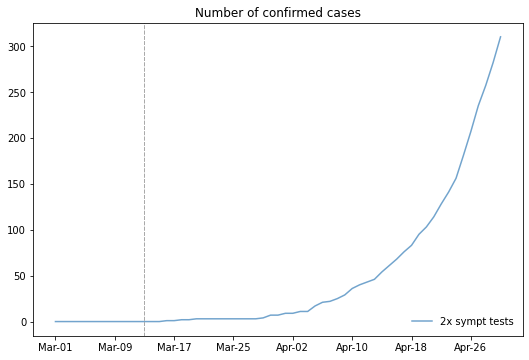

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

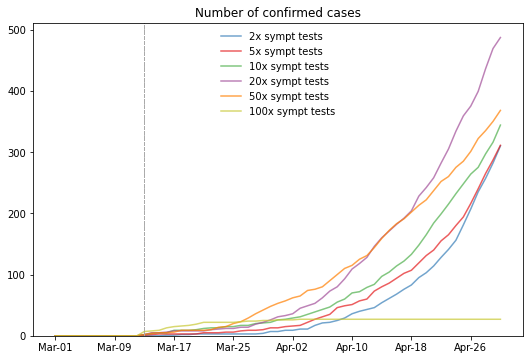

In [57]:
multiS.plot_result("n_diagnosed")

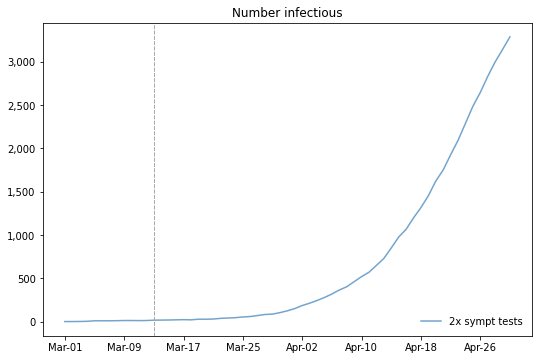

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [58]:
fig = multiS.plot_result("n_infectious")


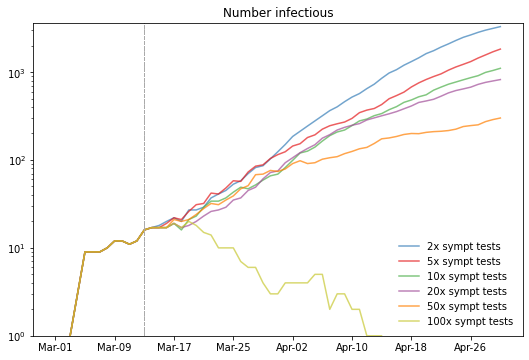

In [59]:
fig.axes[0].set_ylim((1,fig.axes[0].get_ylim()[1]+200))
fig.axes[0].set_yscale("log")
fig